# Time Series Analysis
Lets solve the ambiquity around this term. It is a kind of data analytics. To be precise it is a
statistical technique to analyze data recorded at a specific time intervals.

The main use case is to track the patterns or seasonal variations in the data over time. 
In order to demystify this let's go with the familiar example of instagram reach forecasting.

A **time-series data** is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Instagram-Reach.csv')

In [3]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


If you are a content creator on instagram, you should be able to understand the beat of audience, which means when to push the right content.

Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.

In [4]:
# As a first step we are changing the timestamp format of Date to normal date format.
df['Date'] = pd.to_datetime(df['Date'])
df.head(7)

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532
5,2022-04-06,19408
6,2022-04-07,14941


Now let's plot the data to see if able to find any seasonal changes.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

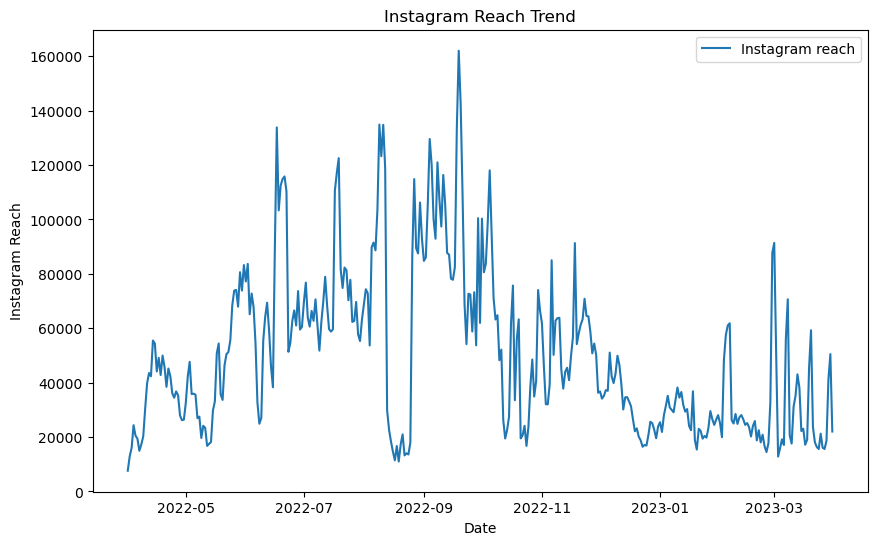

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Instagram reach'], label='Instagram reach')

plt.title('Instagram Reach Trend')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')

plt.legend()

plt.show()

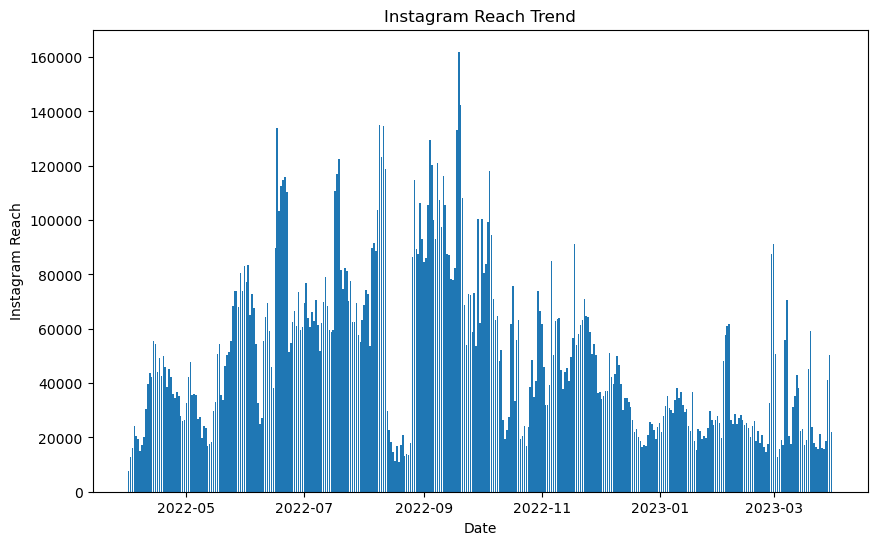

In [6]:
plt.figure(figsize=(10,6))
plt.bar(df['Date'], df['Instagram reach'])

plt.title('Instagram Reach Trend')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')

plt.show()

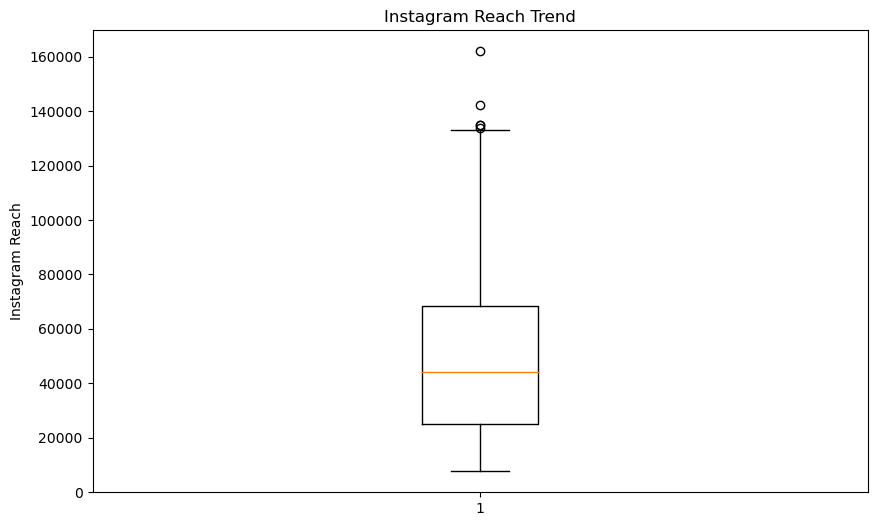

In [7]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Instagram reach'])

plt.title('Instagram Reach Trend')
plt.ylabel('Instagram Reach')

plt.show()

The graphs provides us the entire patterns which might not give us a correct understanding of the current trends. So we are going to analyze the weekly changes in the data as well.

## Patterns in a Time Series

Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.

1. A **trend** is observed when there is an increasing or decreasing slope observed in the time series.
2. A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

In [5]:
#Creating a column for the date as well
df['Day'] = df['Date'].dt.day_name()
print(df.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [6]:
import numpy as np

day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


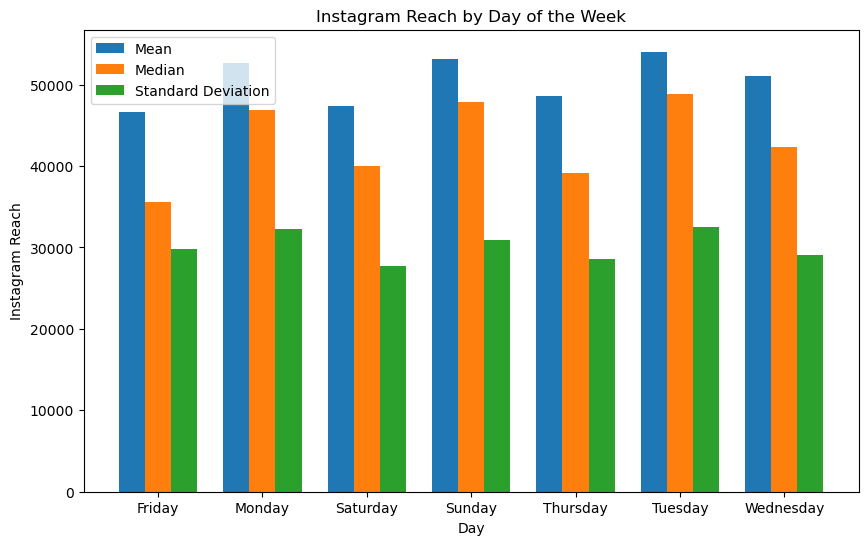

In [7]:
import numpy as np

# Define the width of the bars and the positions of each group
bar_width = 0.25
bar_positions = np.arange(len(day_stats['Day']))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, day_stats['mean'], width=bar_width, label='Mean')
plt.bar(bar_positions + bar_width, day_stats['median'], width=bar_width, label='Median')
plt.bar(bar_positions + 2 * bar_width, day_stats['std'], width=bar_width, label='Standard Deviation')

# Add title and labels
plt.title('Instagram Reach by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Instagram Reach')

# Customize x-axis tick labels
plt.xticks(bar_positions + bar_width, day_stats['Day'])

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Decomposition of time series

**Decomposition of a time series** can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

The seasonal_decompose in **statsmodels** implements this conveniently.

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
print(df.columns) 

Index(['Date', 'Instagram reach', 'Day'], dtype='object')


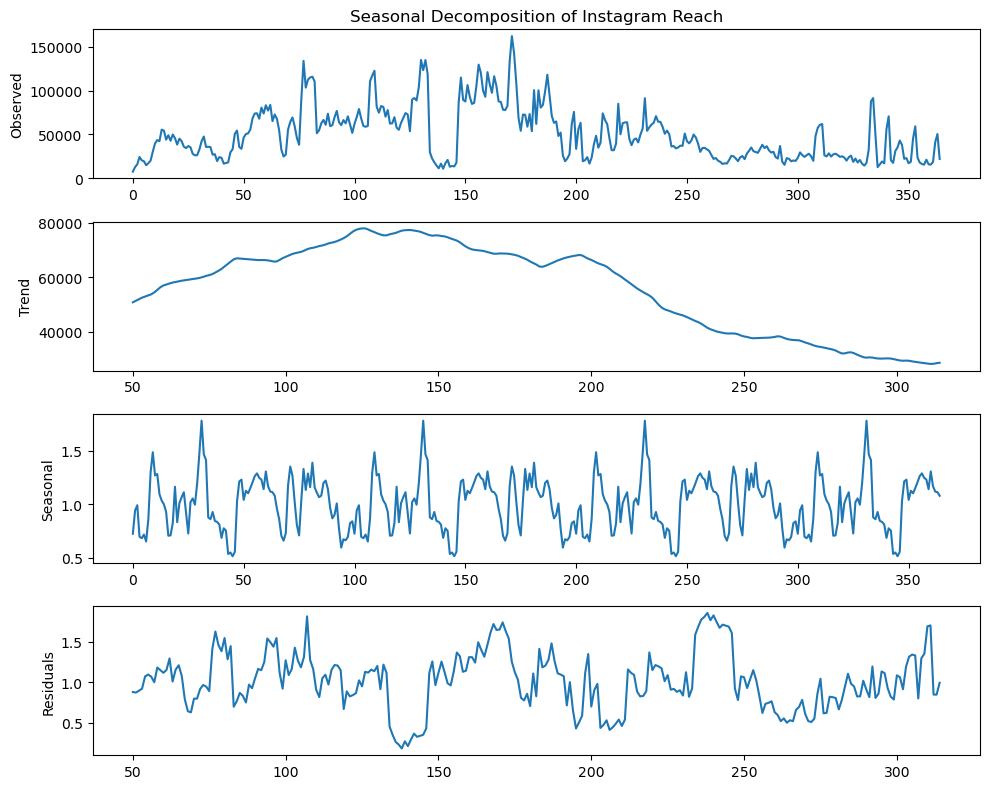

In [13]:
# Extracting only 'Date' and 'Instagram reach' columns from the data
data = df[["Date", "Instagram reach"]]

# Performing seasonal decomposition
result = seasonal_decompose(df['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

# Plotting the results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Observed data
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of Instagram Reach')

# Trend component
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

# Seasonal component
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

# Residuals
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residuals')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting.

**ARIMA** stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

- p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
- d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
- q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

Her the reach is affected by seasonality, so we can use the SARIMA model to forecast the reach of the Instagram account. We need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, we can use the autocorrelation plot, and to find the value of q, we can use a partial autocorrelation plot. The value of d will be 1. 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

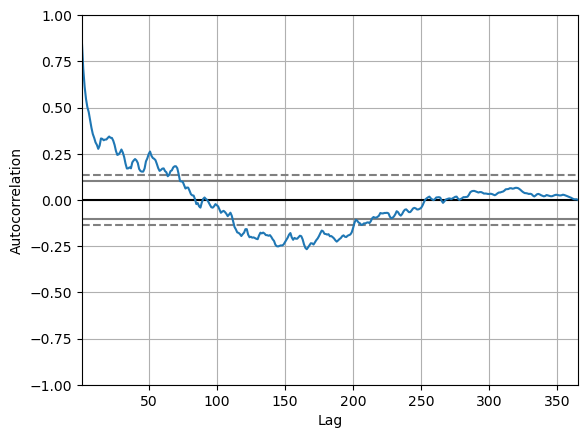

In [9]:
pd.plotting.autocorrelation_plot(df["Instagram reach"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

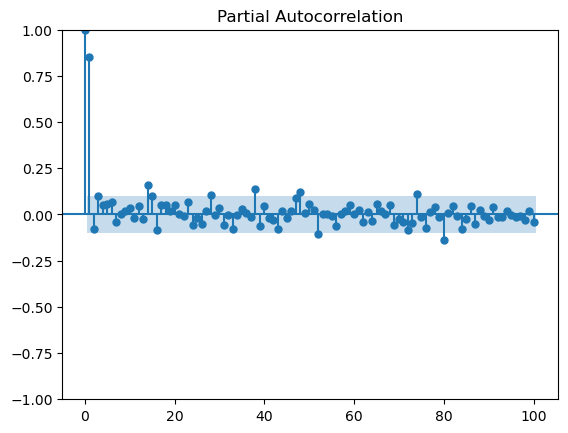

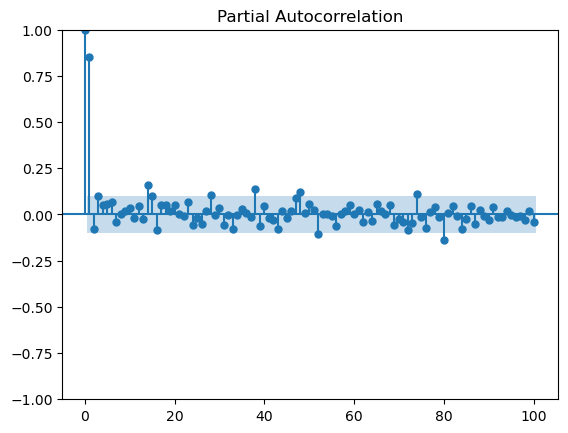

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Instagram reach"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. 

Now here’s how to train a model using SARIMA:

In [12]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\devik\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.513
Date:                            Wed, 09 Oct 2024   AIC                           7919.026
Time:                                    08:38:16   BIC                           8000.162
Sample:                                         0   HQIC                          7951.314
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1911      6.149      0.031      0.975     -11.861      12.243
ar.L2          0.4749      5.733   

Now let’s make predictions using the model and have a look at the forecasted reach:

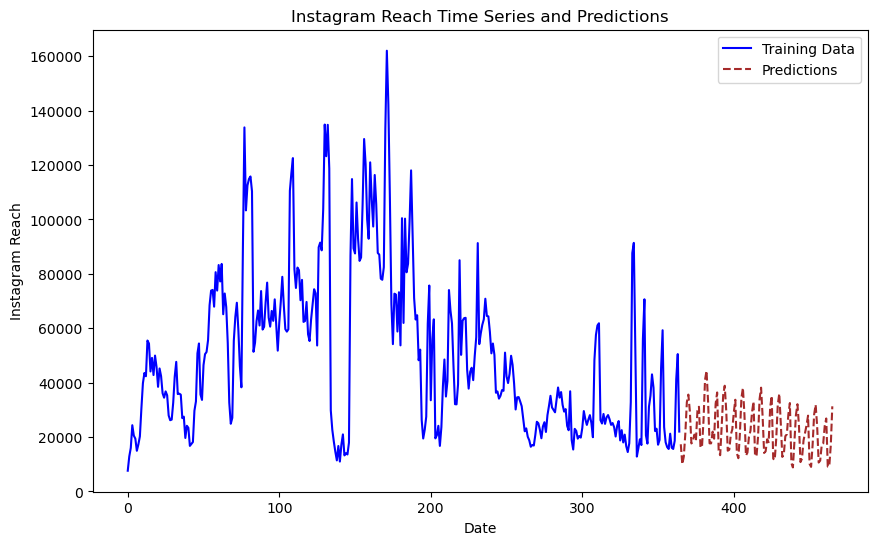

In [14]:
predictions = model.predict(len(df), len(df)+100)
# Plotting the training data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Instagram reach"], label="Training Data", color='blue')

# Plotting the predictions
plt.plot(predictions.index, predictions, label="Predictions", color='brown', linestyle='--')

# Adding title and labels
plt.title("Instagram Reach Time Series and Predictions")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")

# Adding legend
plt.legend()

# Display the plot
plt.show()